![banner-pdi](https://user-images.githubusercontent.com/58775072/141189378-b5df3287-e8c0-48a1-ad11-825ba317463b.png)

## Universidade Federal de Campina Grande (UFCG)
## Centro de Engenharia Elétrica e Informática (CEEI) 
## Disciplina: Int. ao Processamento de Imagem Digital e Visão Computacional
## Professora: Luciana Ribeiro Veloso
## Aluno(a): José Ewerton Cordeiro e Cordeiro

## Observações
***

1. Os arquivos de laboratório devem ser salvos seguindo o seguinte padrão: `lab-x-nome-sobrenome.ipynb`.
2. Não esqueça de colocar o seu nome no cabeçalho acima.
3. Não altere a ordem das células e realize as implementações somente nos campos específicados.  
4. Ao longo do laboratório será solicitado perguntas teóricas relativas aos assuntos das aulas da disciplina e implementações de código utilizando a linguagem de programação Python. 
5. As células de implementação com código serão indicadas pelos seguintes comentários: `# IMPLEMENTE O SEU CÓDIGO AQUI`.
6. Para editar uma célula de texto, basta clicar duas vezes com o cursos do mouse para editar, e `Ctrl + Enter` para finalizar a edição. 
7. Para rodar as células com os códigos desenvolvidos, digite `Ctrl + Enter` ou clique em `Run` no menu do Jupyter.
8. Dúvidas, problemas de execução de código ou dificuldades com a linguagem de programação Python devem ser feitas durante as aulas de laboratório, encaminhadas para o grupo de WhatsApp da turma ou fórum do PVAE da disciplina.
9. Os laboratórios devem ser enviados nos campos especificados pelo PVAE. ATENTE-SE AOS PRAZOS DE ENTREGA!

# <span style='color:red'>Laboratório 6: Redes Neurais Artificiais</span>
***

### Importação dos Pacotes

In [1]:
import os                                                 # operational system para manipulação de arquivos.
import cv2                                                # openCV para manipulação de imagens.
import numpy as np                                        # numpy para manipulação de matrizes e arrays.
import matplotlib.pyplot as plt                           # pyplot para plotagem de gráficos e imagens.
from sklearn.model_selection import train_test_split      # função para particionamento dos dados
from tensorflow.keras.models import Sequential            # classe de modelos sequenciais para construir as redes neurais.
from tensorflow.keras.layers import Dense, Input, Dropout # camada de neurônios densamente conectados.
from tensorflow.keras.optimizers import SGD               # otimizador "Descida do Gradiente com Momento".
from tensorflow.keras.datasets import boston_housing      # dataset utilizado nesse experimento.

### Banco de Dados
* Vamos utilizar um banco de dados do catálogo de datasets do Keras, que é disponibilizado como uma função pronta;

* Cada instância do banco de dados corresponde a um conjunto de 13 valores referentes a características de subúrbios de Boston na década de 1970, a exemplo de taxa de crimes, imposto sobre propriedade, etc;

* Esses valores serão utilizados para calcular o valor mediano das residências no respectivo subúrbio em um problema de regressão, de modo que iremos mapear um vetor de entrada com 13 valores em um vetor de saída com 1 único elemento;

* O banco de dados contém 506 valores divididos em 404 instâncias de treino e 102 de teste;

* Uma descrição mais detalhada dos valores de entrada pode ser vista em http://lib.stat.cmu.edu/datasets/boston, onde os valores são descritos na ordem que aparecem;

### Organização do banco de dados

* Comumente os dados utilizados no treinamento de modelos de inteligência artificial reservam a primeira dimensão para controlar a amostra e espalham o tipo de dado utilizado nas demais dimensões do tensor. 


* Nesse caso, os nossos dados são vetores de características unidimensionais (1D), de modo que são organizados em tensores bidimensionais (2D) com formato: **dados.shape = (amostras, características)**
    * O i-ésimo exemplo pode ser acessado a partir de: **exemplo = dados[i]**
    * A j-ésima característica dos exemplos pode ser acessada a partir de: **caracteristica = dados[:, j]**
    * Porções do tensor podem ser acessadas utilizando fatiamento, por exemplo:
        * primeiros_5_exemplos = dados[:5]
        * caracteristicas_9a13 = dados[8:13]
        

* Lembrem-se que a contagem de índices em Python começa em 0 e só é inclusiva no primeiro elemento:
    * **:5** produz os índices **0, 1, 2, 3, 4** 
    * **8:13** produz os índices **8, 9, 10, 11, 12** 
        

* O banco de dados pode ser carregado utilizando:
    * **(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()**
    * train_data é um tensor com as entradas do conjunto de treino;
    * test_data é um tensor com as entradas do conjunto de teste;
    * train_targets é um tensor com os gabaritos do conjunto de treino;
    * test_targets é um tensor com os gabaritos do conjunto de teste;

## <span style='color:blue'>Questão 1: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* (a) O código abaixo carrega o banco de dados, acesse alguns exemplos de treinamento e de teste e veja suas dimensões.
    * Use índices entre **[0, 404]** para os dados de treino e entre **[0, 102]** para os de teste.

* (b) Verifique as dimensões e as faixas de valores de cada característica nos vetores de entrada dos conjuntos de treino e de teste. A faixa de valores das características são semelhantes? E os dados de treino e de teste?**</span>
    * Encontre os valores mínimo/máximo além da média **(np.mean)** e da variância **(np.var)** de cada uma das 13 características.
    * Sugestão: leia sobre o parâmetro "axis" na documentação das funções **np.min**, **np.max** e **np.mean**.
* (c) Verifique as dimensões e as faixas de valores dos gabaritos dos conjuntos de treino e de teste. Os valores encontrados são semelhantes?

In [40]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [41]:
print("dados de treino 3:",train_data[2,:])
print()
print("shape dos dados de treino:", train_data.shape)

print("--------------")

print("dados de teste 3:", test_data[3,:])
print()
print("shape dos dados de teste:",test_data.shape)

dados de treino 3: [4.89822e+00 0.00000e+00 1.81000e+01 0.00000e+00 6.31000e-01 4.97000e+00
 1.00000e+02 1.33250e+00 2.40000e+01 6.66000e+02 2.02000e+01 3.75520e+02
 3.26000e+00]

shape dos dados de treino: (404, 13)
--------------
dados de teste 3: [  1.27346   0.       19.58      1.        0.605     6.25     92.6
   1.7984    5.      403.       14.7     338.92      5.5    ]

shape dos dados de teste: (102, 13)


|**Características dos Dados de Entrada**|**Descrição**|
|:-:|:-|
|**CRIM**|     <span style='color:red'>per capita crime rate by town</span>|
|**ZN**|       <span style='color:red'>proportion of residential land zoned for lots over 25,000 sq.ft.</span>|
|**INDUS**|    <span style='color:red'>proportion of non-retail business acres per town</span>|
|**CHAS**|     <span style='color:red'>Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)</span>|
|**NOX**|      <span style='color:red'>nitric oxides concentration (parts per 10 million)</span>|
|**RM**|       <span style='color:red'>average number of rooms per dwelling</span>|
|**AGE**|      <span style='color:red'>proportion of owner-occupied units built prior to 1940</span>|
|**DIS**|      <span style='color:red'>weighted distances to five Boston employment centres</span>|
|**RAD**|      <span style='color:red'>index of accessibility to radial highways</span>|
|**TAX**|      <span style='color:red'>full-value property-tax rate per \$10,000</span>|
|**PTRATIO**|  <span style='color:red'>pupil-teacher ratio by town</span>|
|**B**|        <span style='color:red'>$1000(B_k - 0.63)^2$ where Bk is the proportion of blacks by town</span>|
|**LSTAT**|    <span style='color:red'>\% lower status of the population</span>|

|**Características dos Dados de Saída**|**Descrição**|
|:-:|:-|
|**MEDV**|     <span style='color:red'>Median value of owner-occupied homes in \$1000's</span>|

In [42]:
for i in range(13):
    feature = train_data[:, i]
    print("indice ", i+1)
    print("Min valor: ", np.min(feature))
    print("Max valor: ", np.max(feature))
    print("Media valor: ", np.mean(feature))
    print("Variancia: ", np.var(feature))
    print()

indice  1
Min valor:  0.00632
Max valor:  88.9762
Media valor:  3.74511056930693
Variancia:  85.17980732712567

indice  2
Min valor:  0.0
Max valor:  100.0
Media valor:  11.48019801980198
Variancia:  563.5057960003923

indice  3
Min valor:  0.46
Max valor:  27.74
Media valor:  11.104430693069308
Variancia:  46.27907467588962

indice  4
Min valor:  0.0
Max valor:  1.0
Media valor:  0.06188118811881188
Variancia:  0.05805190667581609

indice  5
Min valor:  0.385
Max valor:  0.871
Media valor:  0.5573559405940595
Variancia:  0.013723618009263798

indice  6
Min valor:  3.561
Max valor:  8.725
Media valor:  6.267081683168317
Variancia:  0.5025514413476619

indice  7
Min valor:  2.9
Max valor:  100.0
Media valor:  69.01064356435644
Variancia:  778.7483768135478

indice  8
Min valor:  1.1296
Max valor:  10.7103
Media valor:  3.7402707920792078
Variancia:  4.111569313800362

indice  9
Min valor:  1.0
Max valor:  24.0
Media valor:  9.44059405940594
Variancia:  75.47419370649936

indice  10
Min 

In [37]:
print("Shape de train_data: ", train_data.shape)
print("Valor minimo de train_targets: ", np.min(train_targets))
print("Valor maximo de train_targets: ", np.max(train_targets))

print("Shape de test_data: ", test_data.shape)
print("Valor minimo de test_targets: ", np.min(test_targets))
print("Valor maximo de test_targets: ", np.max(test_targets))

Shape de train_data:  (302, 13)
Valor minimo de train_targets:  5.0
Valor maximo de train_targets:  50.0
Shape de test_data:  (102, 13)
Valor minimo de test_targets:  5.6
Valor maximo de test_targets:  50.0


## <span style='color:green'>Respostas da Questão 1:</span>

* (a) Código implementado
* (b) Os dados não são semelhantes.
* (c) Os dados não são semelhantes.

### Pre-processamento dos dados

* Dados cujas características assumem diferentes faixas de valores muitas vezes são problemáticos para o aprendizado dos modelos e podem reduzir a velocidade de convergência ou até mesmo limitar as capacidades do modelo final.

* Nesse sentido, uma prática comum é a normalização dos dados antes do treinamento, que geralmente é feito por característica em forma da subtração da média e divisão pelo desvio padrão, o que faz com que os dados resultantes tenham média 0 e variância 1.

* Um ponto muito importante é que a normalização deve ser feita partir dos mesmos valores em todos os conjuntos, ou seja, os dados são normalizados segundo informações do conjunto de treino.

* Na prática não temos como calcular a média e variância real, mas se os dados de treino são significativos os seus valores são suficientes.

In [38]:
# Calcula a média do conjunto de treino
mean = train_data.mean(axis = 0)
# Calcula o desvio padrão do conjunto de treino
std = train_data.std(axis = 0)
# Normaliza os dados de treino
train_data -= mean
train_data /= std
# Normaliza os dados de teste
test_data -= mean
test_data /= std

## <span style='color:blue'>Questão 2: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* Repita o item b da primeira questão para os dados normalizados. O que se observa quantos aos valores de média e variância para os dados de treino e teste? Comente a sua interpretação sobre as diferenças observadas.

In [39]:
for i in range(13):
    feature = train_data[:, i]
    print("indice ", i+1)
    print("Min valor: ", np.min(feature))
    print("Max valor: ", np.max(feature))
    print("Media valor: ", np.mean(feature))
    print("Variancia: ", np.var(feature))
    print()

indice  1
Min valor:  -0.45825283841945624
Max valor:  8.736464088266283
Media valor:  0.0
Variancia:  1.000000000000001

indice  2
Min valor:  -0.5142550226851577
Max valor:  3.5867488550787088
Media valor:  3.529185773642882e-17
Variancia:  1.000000000000001

indice  3
Min valor:  -1.4969734843597837
Max valor:  2.4648076665369936
Media valor:  -2.6468893302321612e-17
Variancia:  0.9999999999999997

indice  4
Min valor:  -0.27337354679158216
Max valor:  3.6579984118302202
Media valor:  1.4410841909041767e-16
Variancia:  1.0000000000000027

indice  5
Min valor:  -1.4191039420495881
Max valor:  2.649847152379314
Media valor:  1.764592886821441e-17
Variancia:  0.9999999999999989

indice  6
Min valor:  -3.7849377382093543
Max valor:  2.9366776065432303
Media valor:  -4.117383402583362e-17
Variancia:  1.0000000000000007

indice  7
Min valor:  -2.2989967691059245
Max valor:  1.1250071851543058
Media valor:  -3.970333995348242e-17
Variancia:  1.0000000000000007

indice  8
Min valor:  -1.298

## <span style='color:green'>Resposta da Questão 2:</span>

* Os valores máximo e mínimo tendem a se aproximar de zero após o processo de normalização.<br>
A variância se torna próxima de 1 em todos os casos após o processo de normalização.<br>
As médias dos valores também tendem a se aproximar de zero, pois os valores se aproximam de uma distribuição normal centrada em zero.

Agora vamos criar uma partição de validação a partir do conjunto de treino para realizar uma validação cruzada. Vamos utilizar a função **train_test_split**, que separa dados e os seus respectivos gabaritos segundo uma fração especificada.

In [16]:
# fração escolhida para separar o mesmo número de instâncias do conjunto de testes
data_frac = test_data.shape[0] / train_data.shape[0]

# criação do conjunto de validação
train_data, val_data, train_targets, val_targets = train_test_split(train_data,             # dados de treino
                                                                    train_targets,          # gabaritos de treino
                                                                    test_size = data_frac,  # proporção de dados p/ validação
                                                                    random_state = 42)      # semente de geração

print("Treino:", train_data.shape, train_targets.shape)
print("Validação:", val_data.shape, val_targets.shape)

Treino: (302, 13) (302,)
Validação: (102, 13) (102,)


### Construindo o modelo

Para construir o modelo usaremos a classe **Sequential**, que possibilita a construção de modelos sequenciais de forma bastante simples.
* A construção do modelo é feita a partir do seu instanciamento como objeto da classe seguido de chamadas à função **add()** para adicionar camadas.
* Como estamos construindo apenas Redes Neurais Artificiais por enquanto, vamos utilizar apenas as camadas **Dense** e **Input**.
    * A camada Input cria a entrada da rede com **Input(shape = None )**
        * shape corresponde ao formato do tensor de entrada, no nosso caso será o número de características do nosso banco de dados (13);
    * A camada Dense pode ser chamada com **Dense(n_unidades, activation = 'linear' )**
        * n_unidades corresponde ao número de neurônios da camada;
        * activation corresponde à função de ativação utilizada na camada;
* Algumas funções de ativação disponíveis são:
    * "linear"
    * "relu"
    * "sigmoid"
    * "softmax"
    * "tanh"


* Mais informações sobre a camada dense podem ser vistas em **https://keras.io/api/layers/core_layers/dense/**
* Mais informações sobre as ativações disponíveis podem ser vistas em **https://keras.io/api/layers/activations/**

## <span style='color:blue'>Questão 3: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* (a) A função abaixo constroi um modelo de rede neural e utiliza a função summary() para apresentar um resumo das informações da rede neural produzida. Comente o que faz cada linha do código.
    * (opcional) Modifique parâmetros como o número de unidades de cada camada e/ou o formato do tensor de entrada e/ou o número de saídas.
* (b) Explique como o número de parâmetros de cada camada é calculado.
* (c) Nesse caso utilizamos uma saída com ativação linear. Qual seria a desvantagem de utilizar esse tipo de ativação nas demais camadas?

In [13]:
# COMENTE AS LINHAS DE CÓDIGO AQUI --> QUESTÃO 3 -letra (a)
# Definindo a função build_model que cria o modelo de rede neural
def build_model( n_inputs, n_outputs ):
    '''construção do modelo de rede neural convolucional'''
    # Criando uma instancia do tipo classe Sequential
    rede = Sequential()
    # Adcionando uma camada densa ao modelo, com 64 unidades, função de ativação ReLU e formato de entrada (n_inputs,)
    rede.add( Dense(units = 64, activation = "relu", input_shape = (n_inputs,)))
    # Adcionando outra camada densa ao modelo, com 64 unidades e função de ativação ReLU
    rede.add(Dense(units = 64, activation = "relu"))
    # Adicionando uma ultima camada densa ao modelo, com n_outputs de saida
    rede.add(Dense(units = n_outputs ))
    # Retorna o modelo criado
    return rede

# Criação do modelo usando a função build_model, com 13 entradas e 1 saída
model = build_model(13, 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                896       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


## <span style='color:green'>Respostas da Questão 3:</span>

* (b) O número de parâmetros de cada camada é calculado considerando o número de pesos e biases que a camada possui.<br>
Para a camada dense temos a equação padrão: n_params = (n_inputs + 1) * n_units<br>
* (c) A utilização de uma ativação linear nas camadas intermediárias pode ser uma desvantagem, pois limita a capacidade da rede de modelar relações não-lineares entre as entradas e saídas.

Após a construção do modelo ele deve ser compilado antes que os parâmetros sejam treinados. Isso é feito utilizando a função **compile**:

* **model.compile( optimizer = opt, loss = fperdas, metrics = [] )** 
    * O optimizer é o algoritmo otimizador utilizado no lugar da descida do gradiente, o Keras oferece diversas opções;
        * Para treinar a partir da descida do gradiente utilizaremos o SGD (descida do gradiente com momento), mas setaremos esse parâmetro para 0.
        * **opt = SGD( learning_rate = taxa_de_aprendizagem, momentum = 0 )**
    * A função de perdas pode ser definida a partir do parâmetro loss, como este é um problema de regressão utilizaremos o erro médio quadrático: 
        * **loss = "mse"**
    * Podemos passar uma lista de métricas a serem computadas durante o treinamento, nesse caso utilizaremos o erro médio absoluto:
        * **metrics = ["mae"]**
        * Note que estamos passando uma lista com uma única métrica, mas outras poderiam ser adicionadas à lista.
         
         

* Algoritmos otimizadores populares são o Adam (**https://keras.io/api/optimizers/adam/**) e o RMSprop(**https://keras.io/api/optimizers/rmsprop/**)
* Mais informações sobre os otimizadores disponíveis podem ser vistas em **https://keras.io/api/optimizers/**
* Mais informações sobre as funções de perdas disponíveis podem ser vistas em **https://keras.io/api/losses/**
* Mais informações sobre as métricas disponíveis podem ser vistas em **https://keras.io/api/metrics/**



In [14]:
model = build_model(13, 1)
model.compile( optimizer = SGD(learning_rate = 0.001, momentum = 0.0), loss = "mse", metrics = ["mae"] )
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### Treinando o modelo

O treinamento é realizado a partir da função **fit**, que recebe dados de treino e de validação além de hiperparâmetros como o número de épocas e o tamanho dos lotes de dados (batchsize).

* **hist = model.fit(x = None, y = None, epochs = 1, batchsize = None, validation_data = None, verbose = "auto")**
    * x corresponde aos dados de treino;
    * y corresponde aos gabaritos de treino;
    * epochs corresponde ao número de épocas de treinamento;
    * batchsize corresponde ao tamanho dos lotes entregues à rede de cada vez;
    * validation_data corresponde a uma tupla ( val_data, val_targets ) com os dados de validação;
    * verbose indica como a função deve reportar os resultados:
        * 0: modo silencioso, nenhum retorno em formato de texto;
        * 1: retorno a cada época e barra de progresso;
        * 2: retorno a cada época sem barra de progresso;
    * hist é um dicionário de retorno com os valores de loss e das métricas computadas para treino e validação;

In [17]:
hist = model.fit(x = train_data, y = train_targets, epochs = 100, 
                 batch_size = 1, validation_data = ( val_data, val_targets ), 
                 verbose = 1)

Epoch 1/100
302/302 [==============================] - 1s 2ms/step - loss: 99.9750 - mae: 6.7263 - val_loss: 24.5266 - val_mae: 3.8701
Epoch 2/100
302/302 [==============================] - 0s 1ms/step - loss: 40.7411 - mae: 4.2836 - val_loss: 15.0357 - val_mae: 2.8825
Epoch 3/100
302/302 [==============================] - 0s 1ms/step - loss: 23.2403 - mae: 3.4299 - val_loss: 71.0285 - val_mae: 5.7043
Epoch 4/100
302/302 [==============================] - 0s 1ms/step - loss: 25.3268 - mae: 3.6322 - val_loss: 11.3343 - val_mae: 2.5162
Epoch 5/100
302/302 [==============================] - 0s 1ms/step - loss: 23.4365 - mae: 3.5185 - val_loss: 20.7790 - val_mae: 3.5387
Epoch 6/100
302/302 [==============================] - 0s 1ms/step - loss: 25.3879 - mae: 3.4713 - val_loss: 23.6510 - val_mae: 2.9711
Epoch 7/100
302/302 [==============================] - 0s 1ms/step - loss: 15.9356 - mae: 2.9361 - val_loss: 8.5127 - val_mae: 2.2136
Epoch 8/100
302/302 [==============================] - 0

302/302 [==============================] - 0s 1ms/step - loss: 5.7568 - mae: 1.7851 - val_loss: 14.1521 - val_mae: 2.4964
Epoch 62/100
302/302 [==============================] - 0s 1ms/step - loss: 5.1247 - mae: 1.7156 - val_loss: 28.6851 - val_mae: 3.4276
Epoch 63/100
302/302 [==============================] - 0s 1ms/step - loss: 7.0341 - mae: 1.8273 - val_loss: 18.8657 - val_mae: 2.7090
Epoch 64/100
302/302 [==============================] - 0s 1ms/step - loss: 4.3239 - mae: 1.5460 - val_loss: 13.5856 - val_mae: 2.5271
Epoch 65/100
302/302 [==============================] - 0s 1ms/step - loss: 7.8374 - mae: 1.9570 - val_loss: 12.1139 - val_mae: 2.3485
Epoch 66/100
302/302 [==============================] - 0s 1ms/step - loss: 6.2513 - mae: 1.7050 - val_loss: 10.1985 - val_mae: 2.1843
Epoch 67/100
302/302 [==============================] - 0s 1ms/step - loss: 4.9341 - mae: 1.5789 - val_loss: 9.9584 - val_mae: 2.2187
Epoch 68/100
302/302 [==============================] - 0s 1ms/step -

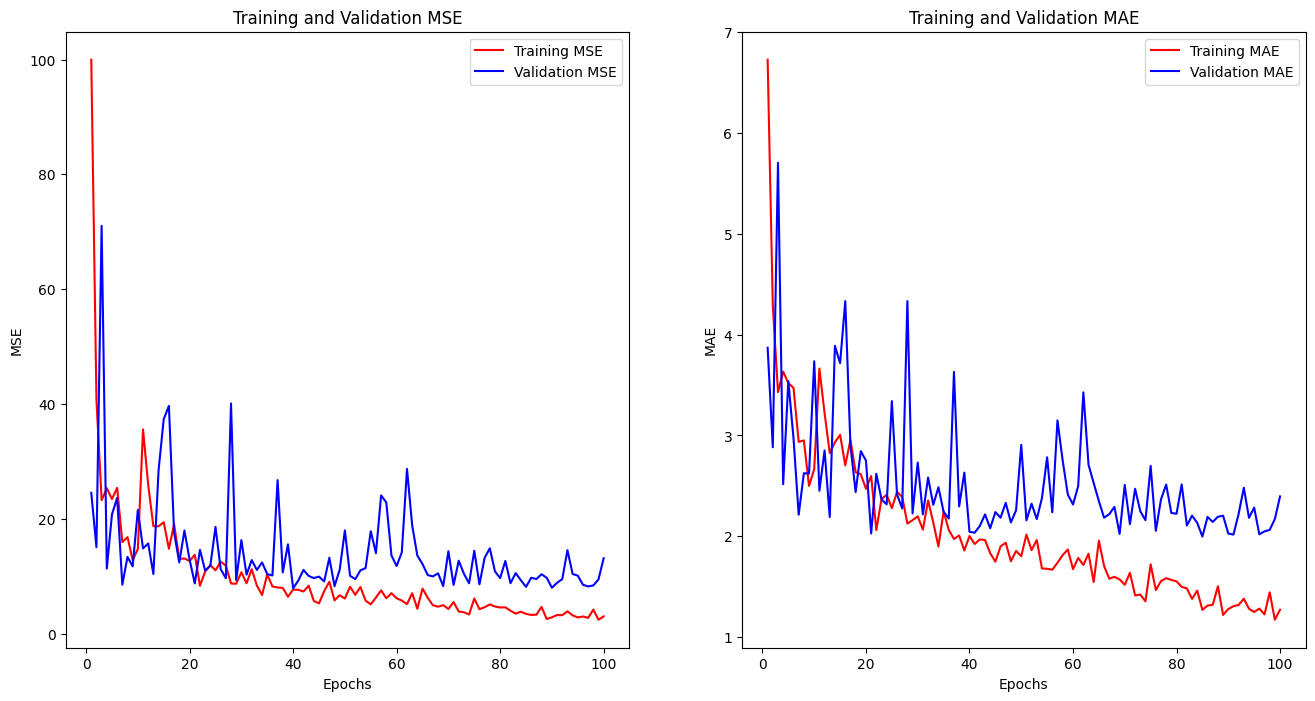

In [18]:
# plotando os resultados obtidos
fig, axes = plt.subplots(1, 2, squeeze = False, figsize = (16,8))

history_dict = hist.history

# loss - MSE
train_loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

# metrica - MAE
train_mae_values = history_dict["mae"]
val_mae_values = history_dict["val_mae"]

ax = axes.flat[0]
ax.plot(epochs, train_loss_values, "r", label = "Training MSE")
ax.plot(epochs, val_loss_values, "b", label = "Validation MSE")
ax.set_title("Training and Validation MSE")
ax.set_xlabel("Epochs")
ax.set_ylabel("MSE")
ax.legend()

ax = axes.flat[1]
ax.plot(epochs, train_mae_values, "r", label = "Training MAE")
ax.plot(epochs, val_mae_values, "b", label = "Validation MAE")
ax.set_title("Training and Validation MAE")
ax.set_xlabel("Epochs")
ax.set_ylabel("MAE")
ax.legend()

## <span style='color:blue'>Questão 4: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* Comente os resultados obtidos nos gráficos acima. Houve overfitting? Se sim, o que pode ser feito para melhorar a qualidade do modelo?

## <span style='color:green'>Respostas da Questão 4:</span>

* Aconteceu o overfitting sim. Uma possivel solução para esse problema é aumentar o tamanho do banco de dados utilizados.

## <span style='color:blue'>Questão 5: [Valor da Questão: 2.0][Taxa de acerto: x.x]</span>

* Modifique hiperparâmetros do modelo como o número de camadas, as funções de ativação, o número de épocas utilizadas e o tamanho dos lotes. Comente os resultados obtidos a partir das mudanças realizadas. Utilize várias células para dividir as etapas de construção dos modelos.

In [23]:
def build_model( n_inputs, n_outputs ):
    '''construção do modelo de rede neural convolucional'''
    # Criando uma instancia do tipo classe Sequential
    rede = Sequential()
    # Adcionando uma camada densa ao modelo, com 64 unidades, função de ativação ReLU e formato de entrada (n_inputs,)
    rede.add( Dense(units = 64, activation = "relu", input_shape = (n_inputs,)))
    # Adcionando outra camada densa ao modelo, com 64 unidades e função de ativação ReLU
    rede.add(Dense(units = 64, activation = "relu"))
    # Adcionando outra camada densa ao modelo, com 64 unidades e função de ativação ReLU
    rede.add(Dense(units = 64, activation = "relu"))
    # Adicionando uma ultima camada densa ao modelo, com n_outputs de saida
    rede.add(Dense(units = n_outputs ))
    # Retorna o modelo criado
    return rede

# Criação do modelo usando a função build_model, com 13 entradas e 1 saída
model = build_model(13, 1)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                896       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [24]:
model = build_model(13, 1)
model.compile( optimizer = SGD(learning_rate = 0.0005, momentum = 0.0), loss = "mse", metrics = ["mae"] )
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                896       
                                                                 
 dense_17 (Dense)            (None, 64)                4160      
                                                                 
 dense_18 (Dense)            (None, 64)                4160      
                                                                 
 dense_19 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,281
Trainable params: 9,281
Non-trainable params: 0
_________________________________________________________________


In [25]:
hist = model.fit(x = train_data, y = train_targets, epochs = 500, 
                 batch_size = 2, validation_data = ( val_data, val_targets ), 
                 verbose = 1)

Epoch 1/500
151/151 [==============================] - 1s 2ms/step - loss: 124.4423 - mae: 7.0925 - val_loss: 27.7506 - val_mae: 4.2134
Epoch 2/500
151/151 [==============================] - 0s 1ms/step - loss: 22.4999 - mae: 3.3490 - val_loss: 15.3463 - val_mae: 2.8669
Epoch 3/500
151/151 [==============================] - 0s 1ms/step - loss: 17.5540 - mae: 3.0017 - val_loss: 13.4686 - val_mae: 2.7690
Epoch 4/500
151/151 [==============================] - 0s 1ms/step - loss: 13.8365 - mae: 2.6472 - val_loss: 8.8992 - val_mae: 2.3780
Epoch 5/500
151/151 [==============================] - 0s 1ms/step - loss: 15.6417 - mae: 2.7819 - val_loss: 10.8148 - val_mae: 2.4230
Epoch 6/500
151/151 [==============================] - 0s 2ms/step - loss: 13.3421 - mae: 2.6258 - val_loss: 20.2597 - val_mae: 3.3721
Epoch 7/500
151/151 [==============================] - 0s 1ms/step - loss: 12.0508 - mae: 2.5035 - val_loss: 10.1943 - val_mae: 2.3878
Epoch 8/500
151/151 [==============================] - 

151/151 [==============================] - 0s 1ms/step - loss: 3.5513 - mae: 1.4618 - val_loss: 10.7090 - val_mae: 2.3243
Epoch 62/500
151/151 [==============================] - 0s 1ms/step - loss: 3.4630 - mae: 1.3958 - val_loss: 14.0703 - val_mae: 2.4436
Epoch 63/500
151/151 [==============================] - 0s 1ms/step - loss: 4.0277 - mae: 1.4649 - val_loss: 16.8008 - val_mae: 2.7150
Epoch 64/500
151/151 [==============================] - 0s 1ms/step - loss: 3.3292 - mae: 1.4231 - val_loss: 10.2011 - val_mae: 2.2316
Epoch 65/500
151/151 [==============================] - 0s 1ms/step - loss: 2.9465 - mae: 1.3095 - val_loss: 11.2725 - val_mae: 2.3020
Epoch 66/500
151/151 [==============================] - 0s 1ms/step - loss: 3.6686 - mae: 1.4161 - val_loss: 13.8214 - val_mae: 2.5037
Epoch 67/500
151/151 [==============================] - 0s 1ms/step - loss: 2.9533 - mae: 1.3037 - val_loss: 10.7575 - val_mae: 2.3420
Epoch 68/500
151/151 [==============================] - 0s 1ms/step 

151/151 [==============================] - 0s 1ms/step - loss: 1.4925 - mae: 0.9204 - val_loss: 12.2596 - val_mae: 2.3861
Epoch 122/500
151/151 [==============================] - 0s 1ms/step - loss: 1.8452 - mae: 1.0131 - val_loss: 13.7471 - val_mae: 2.6690
Epoch 123/500
151/151 [==============================] - 0s 1ms/step - loss: 1.8647 - mae: 1.0171 - val_loss: 12.0562 - val_mae: 2.3325
Epoch 124/500
151/151 [==============================] - 0s 1ms/step - loss: 1.8378 - mae: 0.9691 - val_loss: 12.9987 - val_mae: 2.3719
Epoch 125/500
151/151 [==============================] - 0s 1ms/step - loss: 1.7139 - mae: 1.0169 - val_loss: 13.5661 - val_mae: 2.4855
Epoch 126/500
151/151 [==============================] - 0s 1ms/step - loss: 1.4349 - mae: 0.8946 - val_loss: 12.1342 - val_mae: 2.3025
Epoch 127/500
151/151 [==============================] - 0s 1ms/step - loss: 1.5588 - mae: 0.9160 - val_loss: 14.4384 - val_mae: 2.5657
Epoch 128/500
151/151 [==============================] - 0s 1m

151/151 [==============================] - 0s 1ms/step - loss: 0.9430 - mae: 0.7296 - val_loss: 11.5775 - val_mae: 2.4023
Epoch 182/500
151/151 [==============================] - 0s 1ms/step - loss: 1.0647 - mae: 0.7373 - val_loss: 13.0701 - val_mae: 2.3290
Epoch 183/500
151/151 [==============================] - 0s 1ms/step - loss: 1.1495 - mae: 0.7756 - val_loss: 12.7131 - val_mae: 2.3903
Epoch 184/500
151/151 [==============================] - 0s 1ms/step - loss: 1.1635 - mae: 0.7739 - val_loss: 12.1536 - val_mae: 2.3591
Epoch 185/500
151/151 [==============================] - 0s 1ms/step - loss: 1.2508 - mae: 0.8229 - val_loss: 13.0545 - val_mae: 2.4811
Epoch 186/500
151/151 [==============================] - 0s 1ms/step - loss: 0.8810 - mae: 0.7054 - val_loss: 12.5384 - val_mae: 2.3863
Epoch 187/500
151/151 [==============================] - 0s 1ms/step - loss: 1.0935 - mae: 0.7551 - val_loss: 13.9558 - val_mae: 2.4417
Epoch 188/500
151/151 [==============================] - 0s 1m

151/151 [==============================] - 0s 1ms/step - loss: 0.8304 - mae: 0.6360 - val_loss: 12.6135 - val_mae: 2.4032
Epoch 242/500
151/151 [==============================] - 0s 1ms/step - loss: 0.7962 - mae: 0.6581 - val_loss: 12.3328 - val_mae: 2.3455
Epoch 243/500
151/151 [==============================] - 0s 1ms/step - loss: 0.5439 - mae: 0.5367 - val_loss: 12.8825 - val_mae: 2.4245
Epoch 244/500
151/151 [==============================] - 0s 1ms/step - loss: 0.4794 - mae: 0.5106 - val_loss: 13.2304 - val_mae: 2.3557
Epoch 245/500
151/151 [==============================] - 0s 1ms/step - loss: 0.7429 - mae: 0.6203 - val_loss: 12.4856 - val_mae: 2.3623
Epoch 246/500
151/151 [==============================] - 0s 1ms/step - loss: 0.8056 - mae: 0.6498 - val_loss: 13.0868 - val_mae: 2.3686
Epoch 247/500
151/151 [==============================] - 0s 1ms/step - loss: 0.5926 - mae: 0.5522 - val_loss: 13.4510 - val_mae: 2.4949
Epoch 248/500
151/151 [==============================] - 0s 1m

151/151 [==============================] - 0s 1ms/step - loss: 0.4850 - mae: 0.4992 - val_loss: 12.8203 - val_mae: 2.3468
Epoch 302/500
151/151 [==============================] - 0s 1ms/step - loss: 0.6433 - mae: 0.5431 - val_loss: 13.4587 - val_mae: 2.3496
Epoch 303/500
151/151 [==============================] - 0s 1ms/step - loss: 0.6096 - mae: 0.5531 - val_loss: 13.7000 - val_mae: 2.3965
Epoch 304/500
151/151 [==============================] - 0s 1ms/step - loss: 0.4876 - mae: 0.4987 - val_loss: 12.5351 - val_mae: 2.3983
Epoch 305/500
151/151 [==============================] - 0s 1ms/step - loss: 0.4466 - mae: 0.4687 - val_loss: 13.9744 - val_mae: 2.4477
Epoch 306/500
151/151 [==============================] - 0s 1ms/step - loss: 0.4853 - mae: 0.5042 - val_loss: 13.7656 - val_mae: 2.3701
Epoch 307/500
151/151 [==============================] - 0s 1ms/step - loss: 0.3422 - mae: 0.4148 - val_loss: 13.4252 - val_mae: 2.3885
Epoch 308/500
151/151 [==============================] - 0s 1m

151/151 [==============================] - 0s 1ms/step - loss: 0.2438 - mae: 0.3395 - val_loss: 14.1581 - val_mae: 2.4690
Epoch 362/500
151/151 [==============================] - 0s 1ms/step - loss: 0.2744 - mae: 0.3582 - val_loss: 13.2282 - val_mae: 2.4150
Epoch 363/500
151/151 [==============================] - 0s 1ms/step - loss: 0.3102 - mae: 0.3768 - val_loss: 13.9868 - val_mae: 2.4763
Epoch 364/500
151/151 [==============================] - 0s 1ms/step - loss: 0.2577 - mae: 0.3481 - val_loss: 13.7454 - val_mae: 2.4012
Epoch 365/500
151/151 [==============================] - 0s 1ms/step - loss: 0.2939 - mae: 0.3713 - val_loss: 13.3914 - val_mae: 2.4147
Epoch 366/500
151/151 [==============================] - 0s 1ms/step - loss: 0.2515 - mae: 0.3638 - val_loss: 13.6003 - val_mae: 2.4134
Epoch 367/500
151/151 [==============================] - 0s 1ms/step - loss: 0.2305 - mae: 0.3443 - val_loss: 14.1645 - val_mae: 2.3960
Epoch 368/500
151/151 [==============================] - 0s 1m

151/151 [==============================] - 0s 1ms/step - loss: 0.2271 - mae: 0.3156 - val_loss: 13.6722 - val_mae: 2.4584
Epoch 422/500
151/151 [==============================] - 0s 1ms/step - loss: 0.2094 - mae: 0.3156 - val_loss: 13.7379 - val_mae: 2.4028
Epoch 423/500
151/151 [==============================] - 0s 1ms/step - loss: 0.2105 - mae: 0.3032 - val_loss: 13.7296 - val_mae: 2.4251
Epoch 424/500
151/151 [==============================] - 0s 1ms/step - loss: 0.2352 - mae: 0.3246 - val_loss: 13.5827 - val_mae: 2.4262
Epoch 425/500
151/151 [==============================] - 0s 1ms/step - loss: 0.2219 - mae: 0.3300 - val_loss: 14.4385 - val_mae: 2.4761
Epoch 426/500
151/151 [==============================] - 0s 1ms/step - loss: 0.2189 - mae: 0.3272 - val_loss: 14.2693 - val_mae: 2.4464
Epoch 427/500
151/151 [==============================] - 0s 1ms/step - loss: 0.1624 - mae: 0.2872 - val_loss: 14.3080 - val_mae: 2.4890
Epoch 428/500
151/151 [==============================] - 0s 1m

151/151 [==============================] - 0s 1ms/step - loss: 0.1356 - mae: 0.2602 - val_loss: 13.9082 - val_mae: 2.4542
Epoch 482/500
151/151 [==============================] - 0s 1ms/step - loss: 0.1975 - mae: 0.2943 - val_loss: 13.6639 - val_mae: 2.4342
Epoch 483/500
151/151 [==============================] - 0s 1ms/step - loss: 0.1929 - mae: 0.2933 - val_loss: 14.1449 - val_mae: 2.4830
Epoch 484/500
151/151 [==============================] - 0s 1ms/step - loss: 0.1463 - mae: 0.2778 - val_loss: 13.9782 - val_mae: 2.4541
Epoch 485/500
151/151 [==============================] - 0s 1ms/step - loss: 0.1387 - mae: 0.2437 - val_loss: 14.5403 - val_mae: 2.5094
Epoch 486/500
151/151 [==============================] - 0s 1ms/step - loss: 0.1362 - mae: 0.2592 - val_loss: 14.1600 - val_mae: 2.4849
Epoch 487/500
151/151 [==============================] - 0s 1ms/step - loss: 0.1721 - mae: 0.2808 - val_loss: 14.7739 - val_mae: 2.5119
Epoch 488/500
151/151 [==============================] - 0s 1m

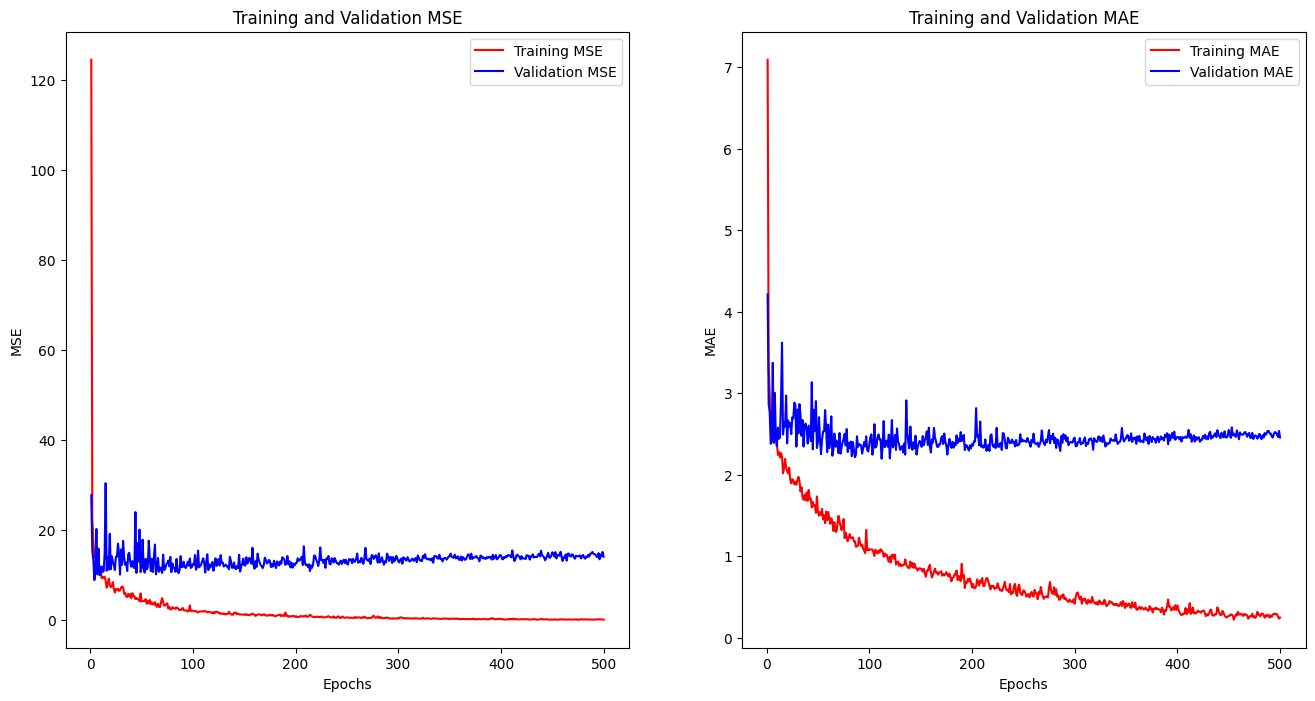

In [26]:
# plotando os resultados obtidos
fig, axes = plt.subplots(1, 2, squeeze = False, figsize = (16,8))

history_dict = hist.history

# loss - MSE
train_loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

# epochs
epochs = range(1, len(train_loss_values) + 1)

# metrica - MAE
train_mae_values = history_dict["mae"]
val_mae_values = history_dict["val_mae"]

ax = axes.flat[0]
ax.plot(epochs, train_loss_values, "r", label = "Training MSE")
ax.plot(epochs, val_loss_values, "b", label = "Validation MSE")
ax.set_title("Training and Validation MSE")
ax.set_xlabel("Epochs")
ax.set_ylabel("MSE")
ax.legend()

ax = axes.flat[1]
ax.plot(epochs, train_mae_values, "r", label = "Training MAE")
ax.plot(epochs, val_mae_values, "b", label = "Validation MAE")
ax.set_title("Training and Validation MAE")
ax.set_xlabel("Epochs")
ax.set_ylabel("MAE")
ax.legend()

## <span style='color:green'>Respostas da Questão 5:</span>

* Adicione suas respostas aqui.

### Teste do modelo

O teste do modelo pode ser realizado a partir da função **evaluate**, que recebe os dados de treino e retorna o valor de loss calculado para esse conjunto e os valores de cada métrica da lista fornecida durante a compilação do modelo. 

* É uma prática comum realizar ajustes no modelo com base no conjunto de validação e só utilizar o conjunto de testes após a definição dos hiperparâmetros definitivos.
* Como os hiperparâmetros são ajustados a partir dos resultados obtidos para o conjunto de validação, o modelo pode acabar. sobreajustando aos dados de validação, então é interessante mudar os dados desse conjunto com frequência.
* Para mudar os dados de validação basta alterar a semente na função train_test_split.
* Crie um novo modelo do zero após a realização de mudanças nos conjuntos de treino/validação.

In [27]:
test_mse, test_mae = model.evaluate( test_data, test_targets)

# observa-se que os dados de saída são normalizados em milhares de dólares, 
# então é necessário multiplicar por 1000 para obter os valores absolutos
print("Erro médio absoluto de teste: ${:.2f}".format(1000*test_mae))

4/4 [==============================] - 0s 4ms/step - loss: 22.3291 - mae: 2.9047
Erro médio absoluto de teste: $2904.66


## <span style='color:blue'>Questão 6: [Valor da Questão: 1.0][Taxa de acerto: x.x]</span>

* Verifique novamente a faixa de valores dos gabaritos no banco de dados. Considerando a extensão dessa faixa de valores, pode-se dizer que as predições do modelo são significativas?

## <span style='color:green'>Resposta da Questão 6:</span>

* Adicione suas respostas aqui.

### Referências
* Chollet, Francois. Deep learning with Python. Simon and Schuster, 2017.

![gif3](https://user-images.githubusercontent.com/58775072/142712798-3c5ce76c-8d6f-4345-8d65-2be3f7aa2ae9.gif)